- Topic: Logisitic Regression 
- Unit: ADS1002
- Level: Beginner
- Author: Ashish Dutt
- Version: 0.0.1

### What is Logistic Regression?

Logistic Regression is a statistical method used for binary classification, where the goal is to predict one of two possible outcomes (like "yes" or "no", "spam" or "not spam"). Unlike linear regression, which predicts continuous values (like predicting the price of a house), logistic regression predicts the probability of a certain event happening.

### How does it work?

- **Linear Regression Foundation:** Logistic regression starts with the principles of linear regression. It tries to fit a line (or more generally, a plane in higher dimensions) to your data.
- **Probability Output**: Instead of directly predicting a value, logistic regression predicts a probability that a given input belongs to a certain class. For example, it might predict a 70% chance that an email is spam.
- **Sigmoid Function:** The key to logistic regression is the sigmoid function, which takes any real-valued number and maps it to a value between 0 and 1. This makes it perfect for predicting probabilities. The logistic regression model uses this sigmoid function to convert the linear combination of inputs (features) into a probability.

### Why is Logistic Regression Useful?

- Binary Outcomes: Logistic regression is ideal for situations where you need to choose between two outcomes, like "yes" or "no", "success" or "failure".
- Interpretable Results: The coefficients in a logistic regression model tell you how each feature influences the outcome, making it easier to understand why the model makes a particular prediction.

### Logistic Regression Classifier with the Iris Dataset

The Iris dataset is a popular dataset that consists of 150 samples from three species of Iris flowers: *Iris setosa*, *Iris versicolor*, and *Iris virginica*. Each sample has four features: sepal length, sepal width, petal length, and petal width.

**1. Importing Required Libraries and Loading the Dataset**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings("ignore")

# Load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

# Convert to a DataFrame for easier analysis
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


# Display the first few rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**2. Correlation Analysis**

Before applying Logistic Regression, it's important to understand the relationships between features. We can use a correlation matrix to observe these relationships.

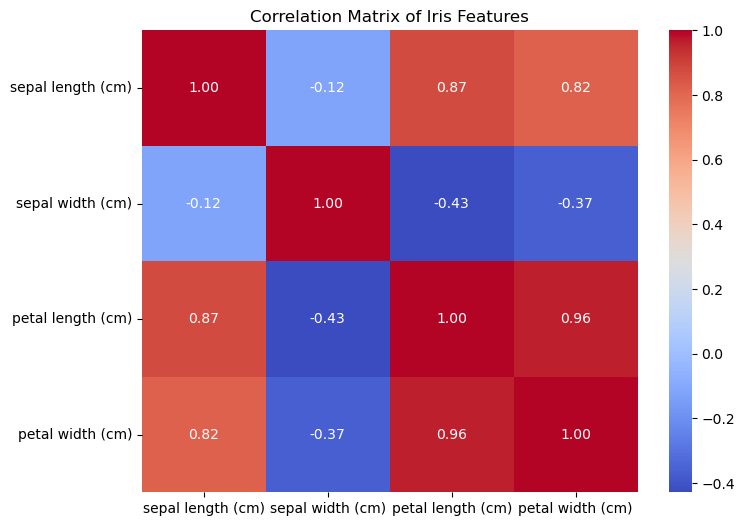

In [2]:
# Compute the correlation matrix (exclude the 'species' column)
corr_matrix = df.drop('species', axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Iris Features')
plt.show()

**3. Feature Selection Using Correlation Coefficients**

To perform feature selection using correlation coefficients, we'll calculate the correlation of each feature with the target variable (`species`). We'll first encode the species labels as numeric values, then compute the correlation of each feature with the target variable.

In [3]:
# Encode the species labels to numeric values (setosa=0, versicolor=1, virginica=2)
df['species_numeric'] = df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

# Calculate the correlation of each feature with the numeric target variable
# correlations = df.drop(['species', 'species_numeric'], axis=1).apply(lambda x: x.corr(df['species_numeric']))

# Calculate the correlation of each feature with the numeric target variable
correlations = df.drop(['species', 'species_numeric'], axis=1).corrwith(df['species_numeric'])

# Sort features by their absolute correlation values
selected_features = correlations.abs().sort_values(ascending=False).index

print(f"Selected features based on correlation: {selected_features.tolist()}")

Selected features based on correlation: ['petal width (cm)', 'petal length (cm)', 'sepal length (cm)', 'sepal width (cm)']


### Code explanation

- **Encoding the Species**: The species_numeric column contains numeric values (0, 1, 2) corresponding to the species labels. This allows us to compute correlations with the features.
- **Correlation Computation**: We calculate the correlation of each feature with the numeric species_numeric column.
- **Feature Selection**: We sort the features by their absolute correlation values to determine which features are most relevant.

#### Binary and Multiclass Logistic Regression

You can now use the `selected_features` list to select the top features for logistic regression, as demonstrated in the previous steps.

**4. Binary Logistic Regression**

Using the most correlated features, we can perform binary logistic regression on a subset of the dataset.

In [4]:
# Filter dataset for binary classification (setosa vs versicolor)
df_binary = df[df['species'].isin(['setosa', 'versicolor'])]

# Convert species labels to numeric (setosa=0, versicolor=1)
df_binary['species_numeric'] = df_binary['species'].map({'setosa': 0, 'versicolor': 1})

# Separate features and target
X_binary = df_binary[selected_features[:2]]
y_binary = df_binary['species_numeric']

# Check if there are enough samples
print(f"Number of samples in binary dataset: {len(df_binary)}")

if len(df_binary) == 0:
    raise ValueError("The binary dataset is empty. Please check the filtering criteria.")

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Logistic Regression model
binary_model = LogisticRegression()
binary_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = binary_model.predict(X_test)
print(f"Binary Classification Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Number of samples in binary dataset: 100
Binary Classification Accuracy: 1.00
[[17  0]
 [ 0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**5. Multiclass Logistic Regression**

We can apply multiclass logistic regression using the selected features.

In [5]:
# Use selected features for the full dataset
X_multi = df[selected_features[:2]]
y_multi = df['species']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.3, random_state=42)

# Standardize the features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Logistic Regression model with multiclass option
multi_model = LogisticRegression(multi_class='ovr')
multi_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = multi_model.predict(X_test)
print(f"Multiclass Classification Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Multiclass Classification Accuracy: 0.96
[[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.85      0.92        13
   virginica       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



#### Code explanation
The above code snippet performs multiclass classification using Logistic Regression on the Iris dataset. Below is a step-by-step breakdown of each section:

**1. Selecting Features and Target Variable**

In [9]:
X_multi = df[selected_features[:2]]
y_multi = df['species']

- `X_multi`: We select the top 2 features from the dataset, which were previously identified based on their correlation with the target variable (species). These features will be used to predict the species of the iris flower.
- `
y_mult`i: The` specie`s column from the dataset contains the labels for the target variable, which corresponds to the species of the flower `(setos`a,` versicolo`r,` virginic`a).

**2. Splitting the Dataset into Training and Testing Sets**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.3, random_state=42)

- `train_test_split`: This function splits the dataset into training and testing sets.

    - `X_train` and `y_train`: These represent 70% of the data used to train the model.
    - `X_test` and `y_test`: These represent 30% of the data used to evaluate the model.
    - `test_size=0.3`: Specifies that 30% of the data will be used for testing.
    - `random_state=42`: Ensures that the split is reproducible. The same random state will generate the same split each time the code is run.

**3. Standardizing the Features**

In [11]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- **Standardization**: This step standardizes the features to ensure that they have a mean of 0 and a standard deviation of 1.

    - **scaler.fit_transform(X_train)**: Fits the `StandardScaler` to the training data and then transforms it. This ensures that the model is trained with scaled features. 
    - **scaler.transform(X_test)**: The same scaling transformation is applied to the test data using the same scaler that was fit on the training data.

Standardizing features is important because it prevents certain features from dominating the model due to their larger values.

**4. Training the Logistic Regression Model**

In [ ]:
multi_model = LogisticRegression(multi_class='ovr')
multi_model.fit(X_train, y_train)

- `multi_model = LogisticRegression(multi_class='ovr')`: Initializes a Logistic Regression model for multiclass classification.

    - `multi_class='ovr'`: Stands for "one-vs-rest." This approach trains one classifier per class and treats it as a binary problem (i.e., it classifies whether the sample belongs to one class or not). This is a common strategy for extending binary classifiers to multiclass problems.
- `multi_model.fit(X_train, y_train)`: Trains the model on the standardized training data (`X_train`) and the corresponding target labels (`y_train`).

**5. Making Predictions**

In [ ]:
y_pred = multi_model.predict(X_test)

- `multi_model.predict(X_test)`: Uses the trained model to predict the species of the flowers in the test set (`X_test`). The result (`y_pred`) is an array containing the predicted labels for each sample in the test set.

**6. Evaluating the Model**

In [ ]:
print(f"Multiclass Classification Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

- `accuracy_score(y_test, y_pred)`: Computes the accuracy of the model, which is the proportion of correct predictions in the test set. The accuracy score is printed with two decimal places.
- `confusion_matrix(y_test, y_pred)`: Produces a confusion matrix, which shows the counts of true positives, true negatives, false positives, and false negatives for each class.
- `classification_report(y_test, y_pred)`: Prints a detailed report of the model's performance, including:

    - **Precision**: The proportion of true positive predictions over all positive predictions.
    - **Recall**: The proportion of true positive predictions over all actual positives.
    - **F1-Score**: The harmonic mean of precision and recall, which gives a balanced measure of model performance.

**Summary of What the Code Does:**

- Selects two features and the target species for multiclass classification.
- Splits the data into training and testing sets (70% for training, 30% for testing).
- Standardizes the feature values to have a mean of 0 and a standard deviation of 1.
- Trains a Logistic Regression model using the "one-vs-rest" approach for multiclass classification.
- Evaluates the model's performance on the test set by calculating accuracy, generating a confusion matrix, and displaying a classification report.

### Visualizing the performance of binary amd multiclass logistic regression classifier

A **ROC (Receiver Operating Characteristic)** plot is a graphical representation used to evaluate the performance of a binary classifier, such as **logistic regression**. It shows how well the model distinguishes between two classes (e.g., positive and negative).

#### Components of the ROC Plot:

- **True Positive Rate (TPR)**: The proportion of actual positives correctly identified by the model. Also known as sensitivity or recall.
- **False Positive Rate (FPR)**: The proportion of actual negatives incorrectly classified as positives.

The plot graphs the **TPR** on the y-axis against the **FPR** on the x-axis at various threshold levels for the model's predicted probabilities.

#### How ROC is related to Logistic Regression?:

In logistic regression, we get probabilities (a score between 0 and 1) for each prediction. These probabilities can be converted into binary decisions by choosing a threshold (e.g., classify as positive if the probability is above 0.5). The ROC curve shows how the TPR and FPR change as we vary this threshold.

#### What to Look For?:

- A **perfect classifier** has a curve that hugs the **top-left corner**, where TPR is high and FPR is low.
- A **random classifier** gives a diagonal line (no distinction between classes).
- The **AUC (Area Under the Curve)** value summarizes the plot. A higher AUC means better model performance.

In simple terms, the ROC plot helps us see how good the logistic regression model is at distinguishing between two classes by examining the balance between correctly identifying positives and avoiding false positives.

**Required Libraries**:

We will use the `roc_curve` and `roc_auc_score` functions from `sklearn.metrics` to compute the ROC curve and AUC (Area Under the Curve).

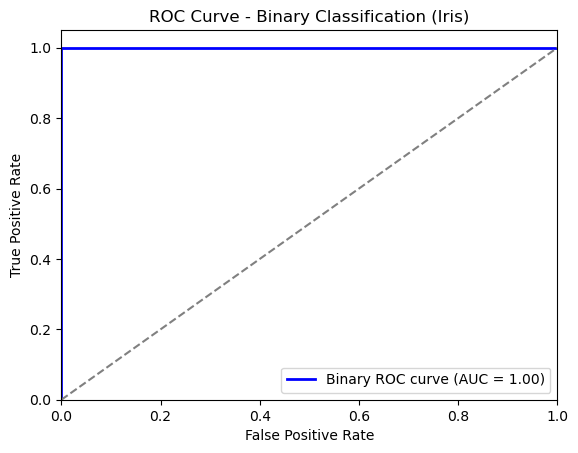

In [6]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Binary classification: Use only class 0 and class 1
X_binary = X[y != 2]  # Select samples that are not class 2
y_binary = y[y != 2]  # Select corresponding labels

# Split the binary dataset into training and testing sets
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)

# Train Logistic Regression for binary classification
clf_bin = LogisticRegression()
clf_bin.fit(X_train_bin, y_train_bin)

# Predict probabilities for the binary classifier
y_scores_bin = clf_bin.predict_proba(X_test_bin)[:, 1]

# Compute ROC curve and ROC AUC for the binary classifier
fpr_bin, tpr_bin, _ = roc_curve(y_test_bin, y_scores_bin)
roc_auc_bin = auc(fpr_bin, tpr_bin)

# Plot ROC curve for binary classification
plt.figure()
plt.plot(fpr_bin, tpr_bin, color='blue', lw=2, label=f'Binary ROC curve (AUC = {roc_auc_bin:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Binary Classification (Iris)')
plt.legend(loc="lower right")
plt.show()

### Code explained

```
# Binary classification: Use only class 0 and class 1
X_binary = X[y != 2]  # Select samples that are not class 2
y_binary = y[y != 2]  # Select corresponding labels
```

- This code selects only the samples corresponding to class 0 and class 1 for binary classification.
    - `X_binary`: Feature matrix containing samples from classes 0 and 1.
    - `y_binary`: Target vector containing labels 0 and 1.

**Predicting Probabilities**
- `y_scores_bin = clf_bin.predict_proba(X_test_bin)[:, 1]`
    - `predict_proba(X_test_bin)`: Predicts the probability that each test sample belongs to class 1 (since logistic regression outputs probabilities).
    - `[:, 1]`: Extracts the probabilities for class 1 (the positive class).

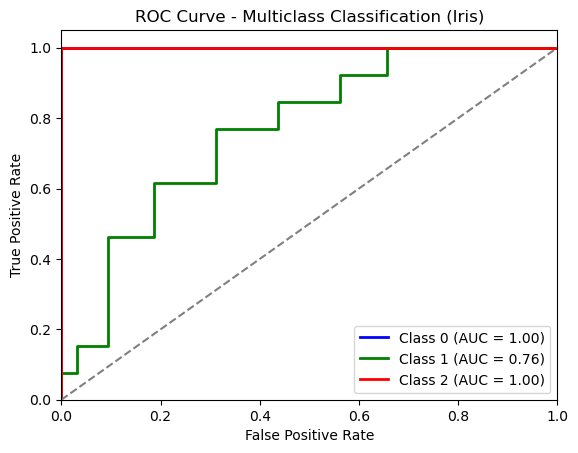

In [7]:
# Multiclass classification: Binarize the labels for one-vs-rest classification
y_bin = label_binarize(y, classes=[0, 1, 2])

# Split the dataset for multiclass classification
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train OneVsRestClassifier for multiclass classification
clf_multi = OneVsRestClassifier(LogisticRegression())
clf_multi.fit(X_train, y_train)

# Predict probabilities for the multiclass classifier
y_scores_multi = clf_multi.predict_proba(X_test)

# Plot ROC curve for each class in multiclass classification
plt.figure()
colors = ['blue', 'green', 'red']
for i in range(3):
    fpr_multi, tpr_multi, _ = roc_curve(y_test[:, i], y_scores_multi[:, i])
    roc_auc_multi = auc(fpr_multi, tpr_multi)
    plt.plot(fpr_multi, tpr_multi, color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc_multi:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiclass Classification (Iris)')
plt.legend(loc="lower right")
plt.show()

### Multiclass ROC Curve Plot Explained

Let's break down the behavior you're observing in the ROC plot for each class (blue, green, and red) based on the code you've provided:

**1. Red Line (Class 2) is Horizontal**:

A horizontal ROC curve (with a false positive rate (FPR) of 1 and a true positive rate (TPR) of 0) often indicates that the classifier failed to correctly classify any instances of that class (Class 2 in this case). This happens when:

- The classifier is unable to distinguish class 2 from the other classes.
- The predicted probabilities for class 2 are very low, leading to no true positives as the thresholds change.
- There could be **no samples in the test set for class 2**, causing the ROC curve to be undefined for that class.

Since the ROC curve is based on the relationship between FPR and TPR, a horizontal line near the bottom (TPR close to 0) means that for every threshold, the classifier is not finding true positives (class 2 predictions).

**2. Green Line (Class 1) is in a Stairway Format**:

The "stairway" shape of the ROC curve for class 1 happens because ROC curves are based on a limited number of possible thresholds in a discrete classification problem. Here's why:

- For smaller datasets or less varied predictions, the number of unique probability scores is limited.
- Each "stair" corresponds to a point where a prediction threshold is crossed, leading to a change in the true positive rate or false positive rate.
- Logistic regression, especially in one-vs-rest classification, often produces a set of discrete probability scores for each class, causing the stair-step pattern.
- **Class 1** seems to have enough variation in the predictions to show multiple steps, but not enough to create a smooth ROC curve.

**3. Blue Line (Class 0) is Not Shown**:

If the ROC curve for class 0 is missing, it could be due to several reasons:

- **No data points for class 0** in the test set: If there are no class 0 samples in the test set, the ROC curve for class 0 would not be plotted because the TPR and FPR cannot be computed.
- **Numerical stability issues**: Sometimes, if the classifier predicts all instances of class 0 correctly (or incorrectly), the ROC curve may appear degenerate (e.g., just a point at (0, 0) or (1, 1)) and not be shown in the plot.
- **Plotting issue**: The `plt.plot()` method should display the blue curve, but if class 0 has no meaningful data in the test set or if all class 0 samples are misclassified, the ROC curve might not appear.